In [1]:
print ('Om Mahaa Ganapataye Namah')

Om Mahaa Ganapataye Namah


## Business Case - Retail warranty return prediction
** The retail file holds the sales , discount , shipment_cost and other vital data. Explore the data to come up with insights. Treat this case study as an open ended and  try to come up with a few insights. Imagine you are responsible for making sure that your marketing stakeholders should be able to come up with the relevant strategies to attract  more customers by unique offers with your insights. Also,  you need to perform from the delivery aspect which can drive the logistics to determine how best they can reduce the  shipment duration and optimize their shipping cost.**

### Step 1 Understanding the business objective and variables

### Step 2

   1. Import libraries  
 
   2. Load all the data files 

   3. Run Statistical summaries 

### Step 3 -  Data Visualization

   1. Univariate Analysis - Checking distribution of continuous variable for outlier detection and missing values 

   2. BiVariate Analysis 
   
   3. Correlation with outcome variable  

##  Data Preprocessing 

### Step 4 - Detecting and  Handling missing Values

   1. Identifying Training and test data missing columns
   2. Percent missing value for each variable
   2. Replacing Missing Values as 'Missing Values' and blank records with NaN 

### Step 5 - Detecting and  Handling Outliers

   1. Checking distribution of continuous variable for outlier detection  
   2. Determine cutoff for capping
   3. Capping the values 

### Step 6 - Feature Extraction and scaling
   1. create new features such as month, day, weekday and year 
   2. No. of days to ship - Ship Date - Order Date
   
### Step 7 - Feature Selection 

### Step 8 - Feature Engineering
   
   1. Dealing with Categorical features 
   2. Converting dates to data objects   
   4. Removing special characters from continuous variable and converting it to numeric feature
   
### Step 9 - Modeling
   1. Model Selection 
   2. Cross Validation
   
### Step 10. Evaluating Model Performance 
   3. Performance metrics
   4. Hyperparameter Optimization

## Import the necessary pacakges

In [2]:
# Import the necessary packages 
import numpy as np

# data processing & Analysis
import pandas as pd

# Operating system commands
import os

# data visualization
import matplotlib.pyplot as plt   # visualization
from  matplotlib import style
import seaborn as sns   # visualization
%matplotlib inline

# Algorithms
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB

## Load the data sets 

In [3]:
# print (os.getcwd())
df = pd.read_csv("./sales_w05.csv",sep=",",encoding= 'ISO-8859-1' )
os.chdir("D:/dat5")
'''
df = pd.read_csv("./sales_w05.csv",sep=",",encoding= 'ISO-8859-1' )
df = pd.read_csv("./sales_w05.csv",sep=",",encoding='Windows-1252')
'''
#print (os.getcwd())

38.4


FileNotFoundError: File b'./sales_w05.csv' does not exist

In [10]:
df.shape
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head(20)
df.shape
df.dtypes
df.size
#type(df)

650026

In [9]:
df.columns

Index(['Row.ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer.Name', 'Segment', 'City', 'State', 'Country',
       'Postal.Code', 'Market', 'Region', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Return', 'Returned'],
      dtype='object')

In [11]:
#25000 * 26
df.Category.value_counts()

Office Supplies    9882
Technology         7946
Furniture          7173
Name: Category, dtype: int64

In [16]:
# loc & iloc operator to slice the data frame 
# df.iloc[rows,columns]
# start:end-1 
df.iloc[0:4,[8,9]]
##df.iloc[0:3,['Segment']]

,City,State
0,New York City,New York
1,Wollongong,New South Wales
2,Brisbane,Queensland
3,Berlin,Berlin


In [25]:
# label based search
df.loc[0:3,['Segment','City']]
#df.loc[0:3,[7,]]

,Segment,City
0,Consumer,New York City
1,Corporate,Wollongong
2,Consumer,Brisbane
3,Home Office,Berlin


In [20]:
# row,column
# [start:end-1,]
df.iloc[0:3,[7,8]]

,Segment,City
0,Consumer,New York City
1,Corporate,Wollongong
2,Consumer,Brisbane


In [43]:
#[] slicing 
df.iloc[0:3,[7,8]]

,Segment,City
0,Consumer,New York City
1,Corporate,Wollongong
2,Consumer,Brisbane


In [6]:
# Display current working directory
# print (os.getcwd())
os.chdir("D:/dat5")

print (os.getcwd())
#df = pd.read_csv("./sales_w05.csv",sep=",")
#df1 = pd.read_csv("./sales_w06.csv",sep=",")
#print df.shape
#print df1.shape

# Combine both df and df1 data frames
df1 = pd.read_csv("D:/dat5/sales_w05.csv",sep=",",encoding= 'ISO-8859-1')
df2 = pd.read_csv("D:/dat5/sales_w06.csv",sep=",",encoding= 'ISO-8859-1')#row wise concatenation
df = pd.concat((df1,df2),axis=0)
# df = df.dropna(how='any',axis=0)
df.head()

D:\dat5


,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [10]:
df[0:2]

,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1


In [11]:
df.iloc[:2,0:3]

,Row.ID,Order_ID,Order_Date
0,32298,CA-2012-124891,7/31/2012
1,26341,IN-2013-77878,2/5/2013


In [12]:
df.iloc[:2,0:6]

,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210


In [17]:
# print (df.loc[9,'Ship_Mode'])
print ('\n')
print ('\n')
#print (df['Ship_Mode'].unique())
print (df['Ship_Mode'].value_counts())





Standard Class    26894
Second Class      10798
First Class        9072
Same Day           3237
Name: Ship_Mode, dtype: int64


In [18]:
print (df['Ship_Mode'].value_counts())

Standard Class    26894
Second Class      10798
First Class        9072
Same Day           3237
Name: Ship_Mode, dtype: int64


In [14]:
print (df['Ship_Mode'].unique())

['Same Day' 'Second Class' 'First Class' 'Standard Class']


In [50]:
#df.loc[:,'Ship_Mode':]
#df.iloc[:,0:2]
# 

#df.iloc[:]  # all rows & all columns
#df.iloc[:,[0,2]]
#df.iloc[:,4:]
#df.loc[:,'Ship_Mode':'City']
#df.loc[:,'Ship_Mode':]
#df.loc[:,['Ship_Mode','City']]
#df.loc[['Ship_Mode','City']]
#dfix['Ship_Mode' == 'Same Day']


,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.00,762.1845,933.57,Critical,No,0
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.10,-288.7650,923.63,Critical,Yes,1
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.10,919.9710,915.49,Medium,No,0
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.5400,910.16,Medium,No,0
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.5200,903.04,Critical,No,0
5,22732,IN-2013-42360,6/28/2013,7/1/2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.10,763.2750,897.35,Critical,No,0
6,30570,IN-2011-81826,11/7/2011,11/9/2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.8400,894.77,Critical,No,0
7,31192,IN-2012-86369,4/14/2012,4/18/2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.4800,878.38,High,No,0
8,40155,CA-2014-135909,10/14/2014,10/21/2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,0.20,1906.4850,867.69,Low,No,0
9,40936,CA-2012-116638,1/28/2012,1/31/2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.40,-1862.3124,865.74,Critical,No,0


In [27]:
df.describe()

,Unnamed: 0,Row.ID,Postal.Code,Quantity,Discount,Profit,Shipping_Cost,Returned
count,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000
mean,12155.878315,36299.354895,55082.079554,4.333829,0.138340,61.435422,54.269180,0.082280
std,7268.956995,2894.560672,32514.869429,2.385945,0.162898,363.374812,80.803806,0.274808
min,1.000000,31297.000000,1040.000000,1.000000,0.000000,-6599.978000,8.230000,0.000000
25%,5916.250000,33740.500000,22204.000000,3.000000,0.000000,5.798000,14.245000,0.000000
50%,11906.000000,36350.000000,55407.000000,4.000000,0.200000,34.892800,26.870000,0.000000
75%,18516.250000,38792.250000,90026.000000,6.000000,0.200000,86.351700,57.120000,0.000000
max,24981.000000,41290.000000,99301.000000,14.000000,0.800000,8399.976000,933.570000,1.000000


# Data Exploration

In [19]:
print (df.size)
print (df.isnull().sum())
#print df2.head(3)
#print df2.info()

1300026
Row.ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer.Name         0
Segment               8
City                  0
State                 0
Country               0
Postal.Code       41912
Market                0
Region                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales               112
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
Return                0
Returned              0
dtype: int64


In [15]:
#df2.columns
#df2.info()
df['Category'].unique()
print ('\n')
print (df['Category'].value_counts())
print ('\n')
df['Sub.Category'].unique()
print ('\n')
print (df['Sub.Category'].value_counts())
print ('\n')
df['State'].unique()
print ('\n')
df['Country'].unique()



Office Supplies    2990
Furniture          2648
Technology         2433
Name: Category, dtype: int64




Phones         1242
Chairs         1088
Storage         950
Accessories     857
Tables          580
Binders         574
Furnishings     566
Paper           548
Appliances      468
Bookcases       414
Machines        200
Art             188
Copiers         134
Envelopes       114
Supplies         80
Labels           66
Fasteners         2
Name: Sub.Category, dtype: int64






array(['United States'], dtype=object)

** Perform Sanity Check &  Preprocess the data  **
    - Explore the missing values
    - Exclude columns that are not required for this analysis
    - Remove special characater if any from numeric varaibles
    - Check for outliers
    - Converting features
    - Creating New Features
    

In [8]:
df.isnull().sum()


Row.ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer.Name     0
Segment           0
City              0
State             0
Country           0
Postal.Code       0
Market            0
Region            0
Product.ID        0
Category          0
Sub.Category      0
Product.Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
Return            0
Returned          0
dtype: int64

In [22]:
df.dtypes
df.Sales.head()

0    2309.650
1    3709.395
2    5175.171
3    2892.510
4    2832.960
Name: Sales, dtype: float64

In [52]:
lm = lambda x:x+2
lm(2)

4

In [12]:
#df = df.dropna(inplace=True)
#df[df['Sales'].str.contains("$",regex=False)]
#df.head()
#df['Sales'].find("$")
#df2.str.contains("$|,",na=False)
#df.filter(regex='$,', axis=1)
#df2.Sales.head(10)

AttributeError: 'NoneType' object has no attribute 'dropna'

In [33]:
df.shape

(4036, 26)

In [34]:
df.size

104936

In [21]:
# Drop columns those are irrelevant
# drops = df2['Postal.Code','Phone_no']
df['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[$,]',''))
df.head()
# now $ and , got removed # Drop columns those are irrelevant
# drops = df2['Postal.Code','Phone_no']
#df2['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[$,]', ''))
#df2.head()
# now $ and , got removed 

,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,No,0
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,No,0
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,No,0


In [37]:
df.dtypes

Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [17]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
# select sum(Sales) from df2 group by (country,cateogyr)
df_agg = df.groupby(['Country','Category']).agg({'Sales':"sum"})
print (df_agg )

df_agg1 = df.groupby(['Country','Category'])['Sales','Quantity'].sum()
print (df_agg1)

                                     Sales
Country       Category                    
United States Furniture        698284.5693
              Office Supplies  588412.9360
              Technology       779314.0500
                                     Sales  Quantity
Country       Category                              
United States Furniture        698284.5693     11028
              Office Supplies  588412.9360     13850
              Technology       779314.0500     10103


In [25]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
#df_agg
df_agg = pd.pivot_table(df2,index=['Country','Category'],values=['Quantity','Sales'], aggfunc=[np.sum],dropna=False)
df_agg.head(3)

sum          
                            Quantity     Sales
Country     Category                          
Afghanistan Furniture             40  11080.41
            Office Supplies       74   2818.20
            Technology            47   6320.67

In [30]:
# produce a report month wise, day wise 
print (df.dtypes)


Row.ID                      int64
Order_ID                   object
Order_Date         datetime64[ns]
Ship_Date          datetime64[ns]
Ship_Mode                  object
Customer_ID                object
Customer.Name              object
Segment                    object
City                       object
State                      object
Country                    object
Postal.Code               float64
Market                     object
Region                     object
Product.ID                 object
Category                   object
Sub.Category               object
Product.Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping_Cost             float64
Order_Priority             object
Return                     object
Returned                    int64
days2Ship         timedelta64[ns]
year                        int64
month                       int64
day           

In [28]:
import datetime as dt
df['Order_Date'] = pd.to_datetime(df.Order_Date)
df['Ship_Date'] =  pd.to_datetime(df.Ship_Date)
df['days2Ship'] =  df['Ship_Date'] - df['Order_Date']
df.dtypes
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day
df['dofweek'] = df['Order_Date'].dt.dayofweek
df['days'] = df[['Order_Date']].apply(lambda x: dt.datetime.strftime(x['Order_Date'], '%A'), axis=1)
df.head

<bound method NDFrame.head of        Row.ID         Order_ID Order_Date  Ship_Date       Ship_Mode  \
0       32298   CA-2012-124891 2012-07-31 2012-07-31        Same Day   
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
2       25330    IN-2013-71249 2013-10-17 2013-10-18     First Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
4       47221     SG-2013-4320 2013-11-05 2013-11-06        Same Day   
5       22732    IN-2013-42360 2013-06-28 2013-07-01    Second Class   
6       30570    IN-2011-81826 2011-11-07 2011-11-09     First Class   
7       31192    IN-2012-86369 2012-04-14 2012-04-18  Standard Class   
8       40155   CA-2014-135909 2014-10-14 2014-10-21  Standard Class   
9       40936   CA-2012-116638 2012-01-28 2012-01-31    Second Class   
10      34577   CA-2011-102988 2011-04-05 2011-04-09    Second Class   
11      28879    ID-2012-28402 2012-04-19 2012-04-22     First Class   
12      45794     SA-2011-1830 201

In [32]:
df_pv2 = pd.pivot_table(df,index=['Category','dofweek'],values=['Sales'], aggfunc=[np.sum],dropna=False)
df_pv2.head(3)

sum
                         Sales
Category  dofweek             
Furniture 0        678886.1911
          1        656891.2861
          2        639442.6700

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 3240x2880 with 0 Axes>

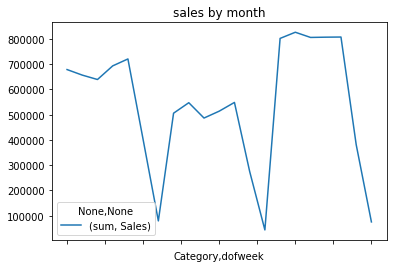

In [33]:
fig=plt.figure(figsize=(45,40))
ax1=df_pv2.plot(kind='line')
plt.title('sales by month')
plt.show
#fig.savefig("D:/dat5/fig1.png",dpi=300)

C:\Users\home\Anaconda369\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


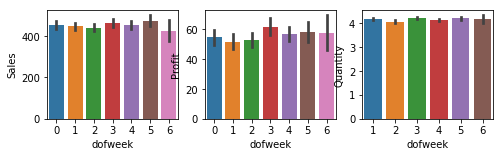

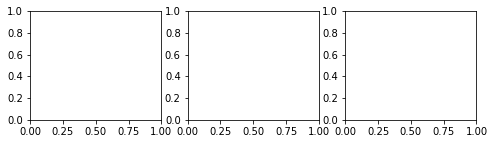

In [35]:
# figsize (width,height)
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1,ncols=3,figsize=(8,2))

sns.barplot(x='dofweek',y='Sales',data=df, order=[0,1,2,3,4,5,6],ax=axis1)
sns.barplot(x='dofweek',y='Profit',data=df, order=[0,1,2,3,4,5,6],ax=axis2)
sns.barplot(x='dofweek',y='Quantity',data=df, order=[1,2,3,4,5,6],ax=axis3)

fig, (axis1,axis2,axis3) = plt.subplots(nrows=1,ncols=3,figsize=(8,2))

In [35]:
df2.columns

Index([u'Unnamed: 0', u'Row.ID', u'Order_ID', u'Order_Date', u'Ship_Date',
       u'Ship_Mode', u'Customer_ID', u'Customer.Name', u'Segment', u'City',
       u'State', u'Country', u'Postal.Code', u'Market', u'Region',
       u'Product.ID', u'Category', u'Sub.Category', u'Product.Name', u'Sales',
       u'Quantity', u'Discount', u'Profit', u'Shipping_Cost',
       u'Order_Priority', u'Return', u'Returned', u'year', u'month', u'day',
       u'dofweek', u'days'],
      dtype='object')

In [36]:
df['Sales2'] = df.Sales /100000
seg_cat_sales = pd.pivot_table(df,values='Sales2',index='Segment', columns=['Category'],aggfunc='sum')
seg_cat_sales1 = pd.pivot_table(df,values='Sales2',index='Segment', columns=['Category'],aggfunc='count')
seg_cat_sales.head()
seg_cat_sales1.head()

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,3671,5159,4140
Corporate,2217,2911,2357
Home Office,1262,1797,1427


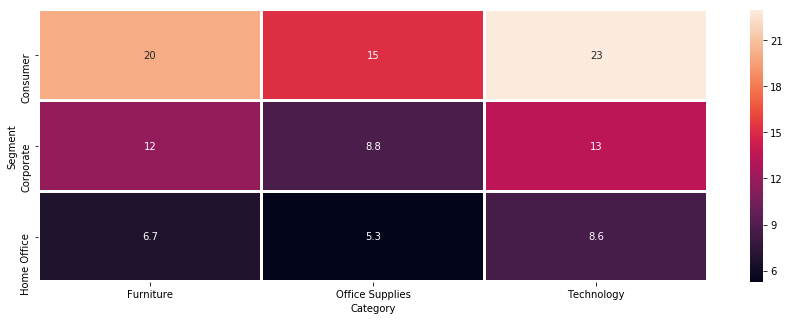

In [37]:
plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)

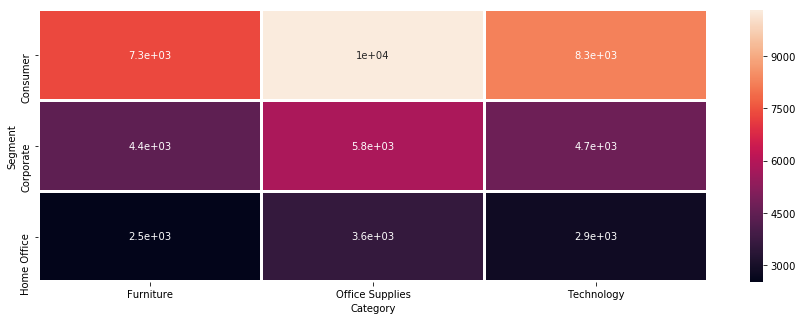

In [127]:
fig, (axis1)= plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales1,annot=True,linewidth=2)

In [9]:
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='Ship_Mode', columns=['Category'],aggfunc='sum')

seg_cat_sales.head()

Category,Furniture,Office Supplies,Technology
Ship_Mode,,,
First Class,11.156712,9.589411,12.853038
Same Day,3.739631,3.237041,5.171952
Second Class,15.564543,12.755993,18.192720
Standard Class,46.945409,32.859239,53.873378


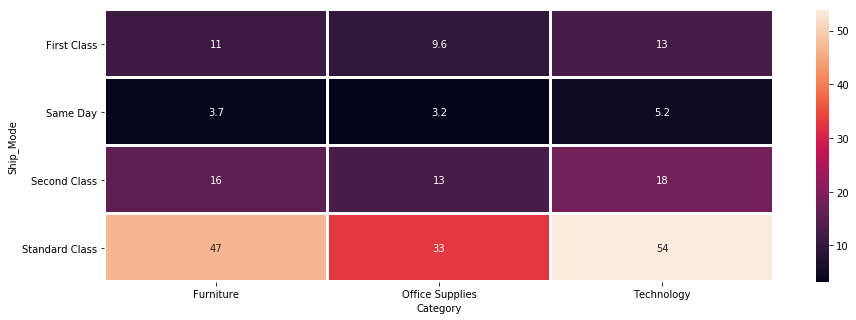

In [10]:
fig, (axis1)= plt.subplots(1,1,figsize=(15,5))
ns.heatmap(seg_cat_sales,annot=True,linewidth=2)

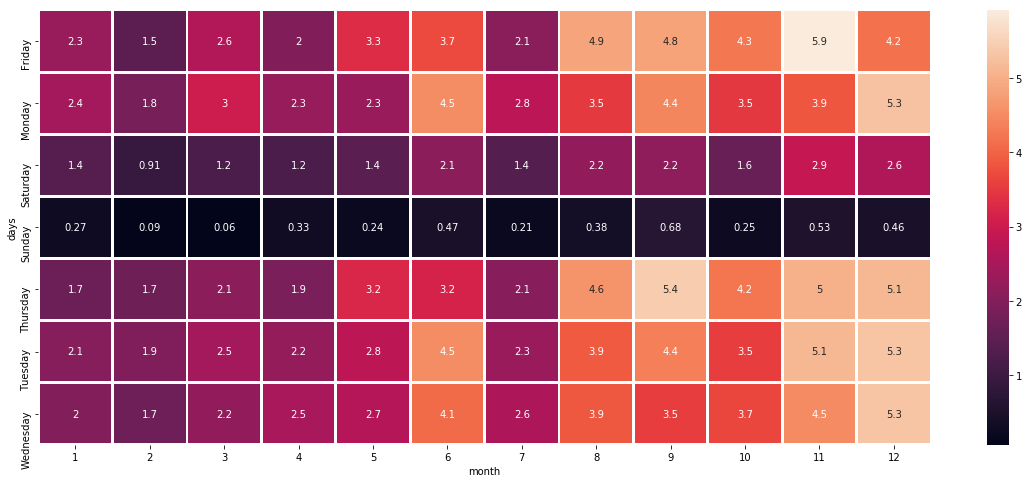

In [13]:
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='days', columns=['month'],aggfunc='sum')
fig, (axis1)= plt.subplots(1,1,figsize=(20,8))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)
spsadfk

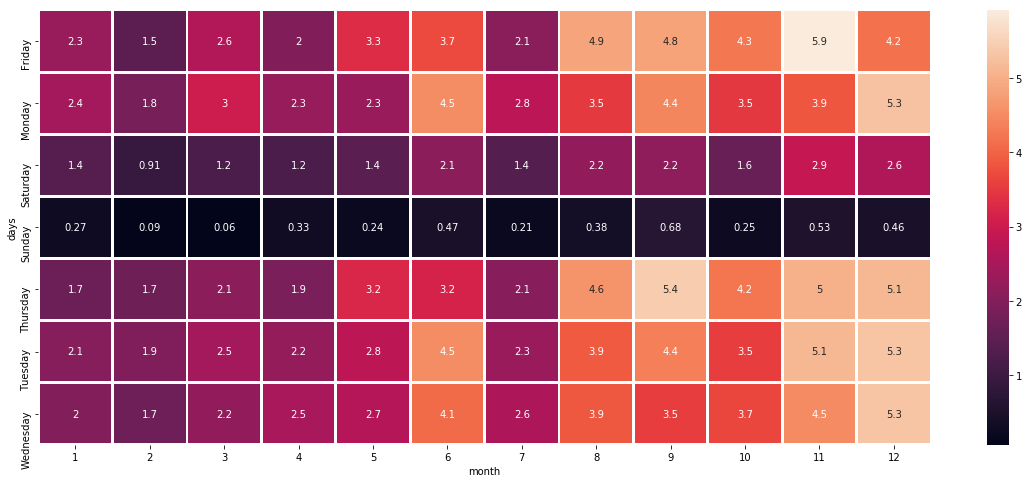

In [14]:
# returns 
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='days', columns=['month'],aggfunc='sum')
fig, (axis1)= plt.subplots(1,1,figsize=(20,8))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)


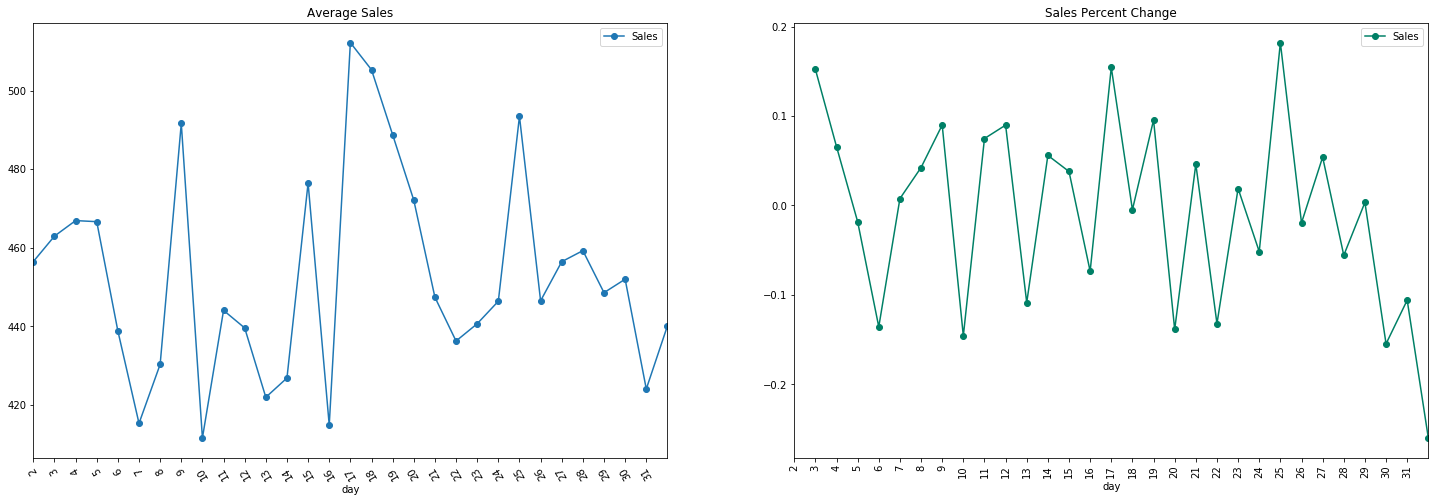

In [15]:
# group by date and get average sales, and precent change
average_sales   = df2.groupby('day')["Sales"].mean()
pct_change_sales = df2.groupby('day')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(25,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=120)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

KeyError: 'Consumer'

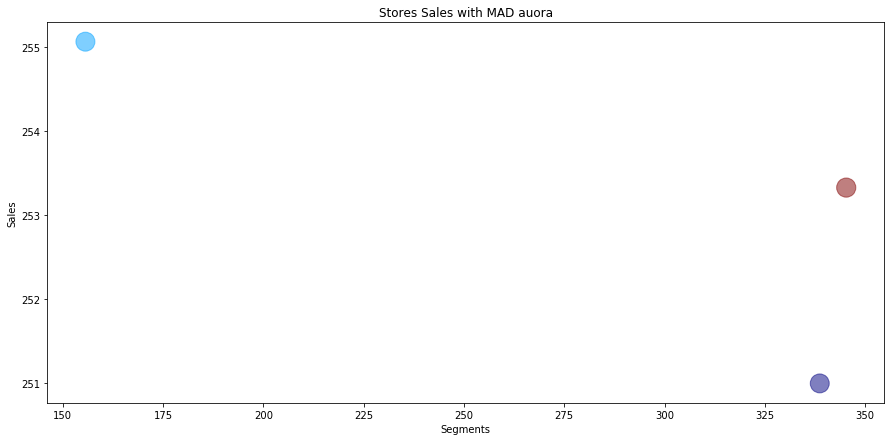

In [16]:
sales_perstore = df2.groupby('Segment')['Sales'].median()
mad_sales_perstore = df2.groupby('Segment')['Sales'].mad()

cust_perstore = df2.groupby('Category')['Sales'].median()
mad_cust_perstore = df2.groupby('Category')['Sales'].mad()
# sales to customer ratio
sales_cust_ratio = sales_perstore/cust_perstore
#mad_sales_cust_ratio = mad_sales_perstore/cust_perstore  # MAD for sales_cust_ratio is ratio between MAD sales and total customers
# plot scatter plot of sales vs customers
fig, (axis1) = plt.subplots(1,1, sharex=True,figsize=(15,7))
colors = np.random.rand(len(sales_perstore))
axis1,,.scatter(cust_perstore, sales_perstore, s=mad_sales_perstore, c=colors, cmap='jet', alpha=0.5)
axis1.set_xlabel('Segments')
axis1.set_ylabel('Sales')
axis1.set_title('Stores Sales with MAD auora')
for store in sales_perstore.index:
    #print('{}'.format(sales_perstore[i]))
    axis1.annotate(store, (cust_perstore[store], sales_perstore[store]))
# plot a fitted line
linefit = np.poly1d(np.polyfit(cust_perstore, sales_perstore, 1))(cust_perstore);
axis1.plot(cust_perstore, linefit)

ValueError: x and y must be the same size

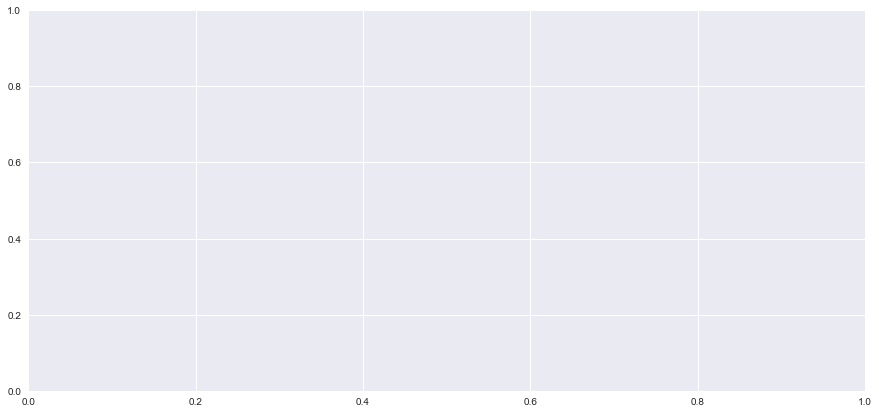

In [17]:
SC_perstore = df2.groupby('Segment')['Profit'].median()
mad_SC_perstore = df2.groupby('Segment')['Profit'].mad()
cust_perstore = df2.groupby('State')['Profit'].median()
mad_cust_perstore = df2.groupby('State')['Profit'].mad()
# scatter plot of sales/customers vs customers
sns.set(font_scale=1)
fig, (axis1) = plt.subplots(1,1, sharex=True,figsize=(15,7))
colors = np.random.rand(len(SC_perstore))
axis1.scatter(cust_perstore, SC_perstore, s=mad_SC_perstore*1000, c=colors, cmap='jet', alpha=0.5) # multiplying "size" by 1000 to make the extent visible
axis1.set_xlabel('Customers')
axis1.set_ylabel('Sales/Customers')
axis1.set_title('Stores Sales/Customers ratio with MAD auora')
for store in SC_perstore.index:
    #print('{}'.format(sales_perstore[i]))
    axis1.annotate(store, (cust_perstore[store], SC_perstore[store]))

In [16]:
g = sns.FacetGrid(df2, col="Ship_Mode",  row="Sales")
g
# g = g.map(plt.hist, "total_bill")

KeyboardInterrupt: 

ValueError: Image size of 864x3360960 pixels is too large. It must be less than 2^16 in each direction.

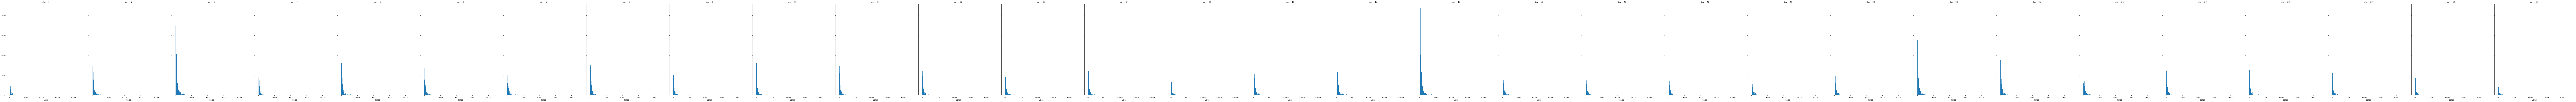

In [17]:
g1 = sns.FacetGrid(df2, col="day", size=8, aspect=.8)
g1 = g1.map(plt.hist, "Sales", bins=100)
g1

In [ ]:
g = sns.FacetGrid(df2, col="Returned", row="sex",
                   margin_titles=True)
 g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
       .set(xlim=(0, 60), ylim=(0, 12),
            xticks=[10, 30, 50], yticks=[2, 6, 10])
       .fig.subplots_adjust(wspace=.05, hspace=.05))

In [ ]:
df2.columns

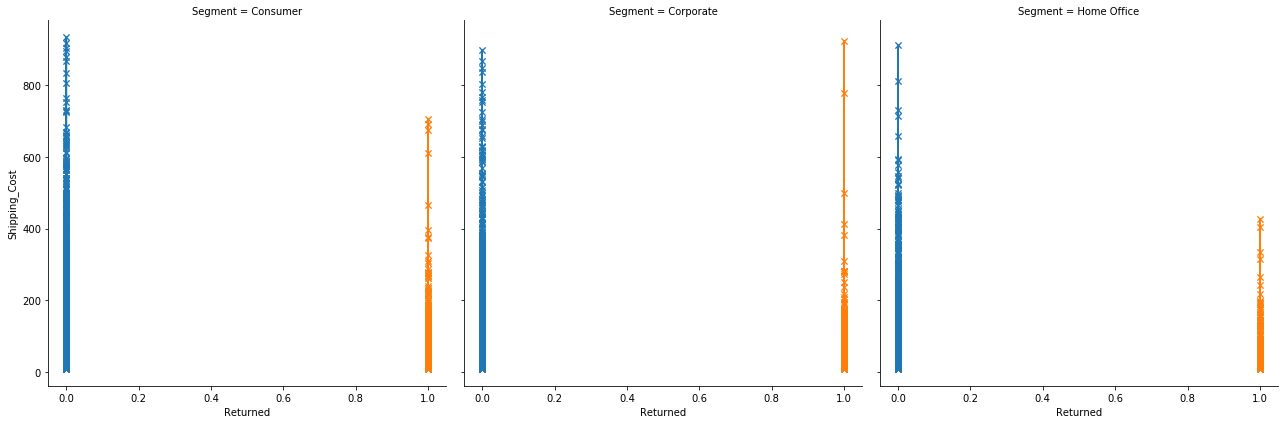

In [45]:

#g2 = sns.FacetGrid(df2,col='Category', hue='Returned',size=6)
#g2.map(plt.plot,"Returned","Shipping_Cost", marker= "*")
# g = g.map(plt.hist, "total_bill")
g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
g3.map(plt.plot,"Returned","Shipping_Cost", marker= "x")



In [8]:
df2.columns

Index([u'Unnamed: 0', u'Row.ID', u'Order_ID', u'Order_Date', u'Ship_Date',
       u'Ship_Mode', u'Customer_ID', u'Customer.Name', u'Segment', u'City',
       u'State', u'Country', u'Postal.Code', u'Market', u'Region',
       u'Product.ID', u'Category', u'Sub.Category', u'Product.Name', u'Sales',
       u'Quantity', u'Discount', u'Profit', u'Shipping_Cost',
       u'Order_Priority', u'Return', u'Returned', u'year', u'month', u'day',
       u'dofweek'],
      dtype='object')

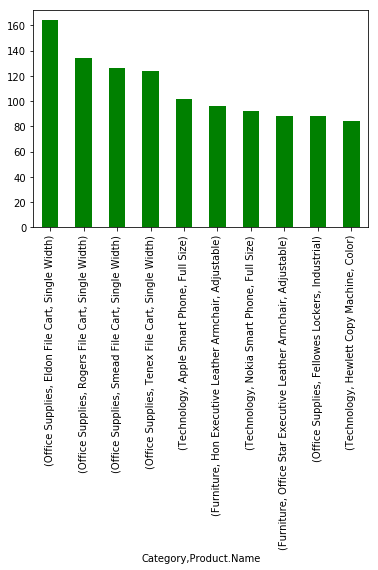

In [136]:
df5 = df2.groupby(['Product.Name'])['Returned'].count()
top5 = df2.groupby(['Category','Product.Name'])['Returned'].count().nlargest(10).plot(kind='bar',color='g')
top5

# top5[0:2]
# g6 = sns.plot(top5,x=top5[0]
#g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
#g3.map(plt.plot,"Returned","Shipping_Cost", marker= "*")
# top5[0:2]
# g6 = sns.plot(top5,x=top5[0]
#g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
#g3.map(plt.plot,"Returned","Shipping_Cost", marker= "*")

Axes(0.125,0.125;0.775x0.755)


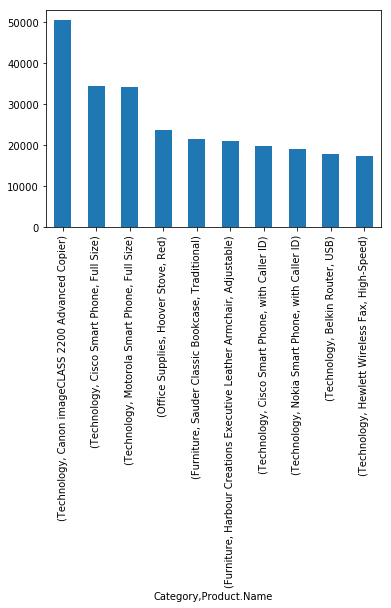

In [121]:
# df5 = df2.groupby(['Product.Name'])['Returned'].count()
top55 = df2.groupby(['Category','Product.Name'])['Profit'].sum().nlargest(10).plot(kind='bar')
print top55


Axes(0.125,0.125;0.775x0.755)


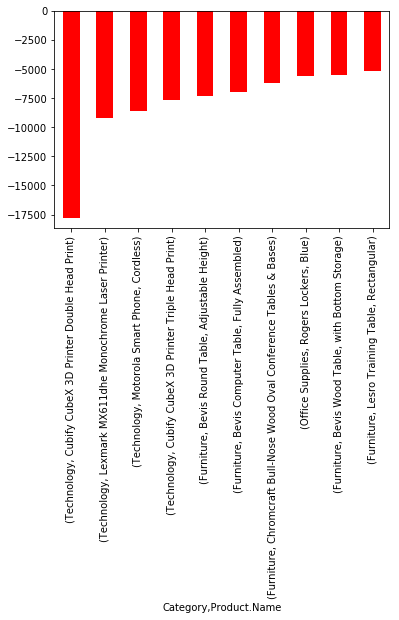

In [137]:
bot55 = df2.groupby(['Category','Product.Name'])['Profit'].sum().nsmallest(10).plot(kind='bar',color='r')
print bot55

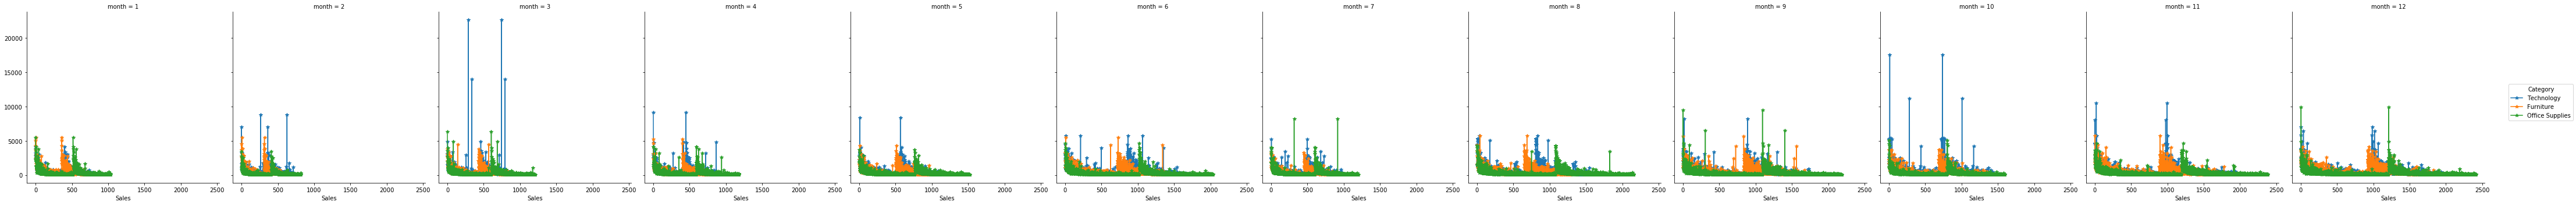

In [132]:
# g = g.map(plt.hist, "total_bill")
g3 = sns.FacetGrid(df2,col='month', hue='Category',size=5)
g3.map(plt.plot,"Sales", marker= "*").add_legend()
plt.savefig("D:/dat5/mSales")

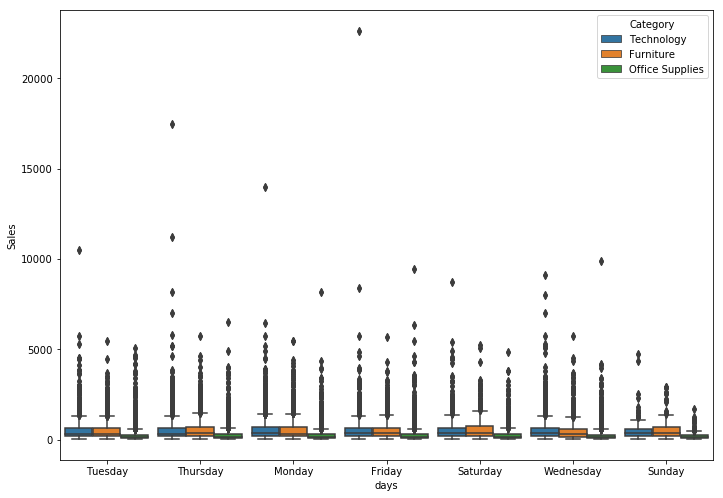

In [179]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
# seaborn.voilinplot(ax=ax, data=df, **violin_options)
sns.boxplot(x="days", y="Sales", hue="Category", data=df2, dodge=True,width=0.9);
#help(sns.boxplot)

In [33]:
# data['weekday'] = data['my_dt'].apply(lambda x: x.weekday())
#then you can filter for weekdays with:
# weekdays_only = data[data['weekday'] < 5 ]
# We apply, row by row (axis=1) a timedelta operation
# df['week_start'] = df.apply(lambda x: x['myday'] - dt.TimeDelta(days=x['mydays']), axis=1)

df2['days'] = df2[['Order_Date']].apply(lambda x: dt.datetime.strftime(x['Order_Date'], '%A'), axis=1)
df2.head(3)
# df['week_start'] = df['myday'].dt.to_period('W').apply(lambda r: r.start_time)
# df['week_start'] = df['Order_Date'].dt.to_period('W').apply(lambda r: r.start_time)

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Profit,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days
0,1,32298,CA-2012-124891,2012-07-31,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,762.1845,933.57,Critical,No,0,2012,7,31,1,Tuesday
1,2,26341,IN-2013-77878,2013-02-05,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,-288.7650,923.63,Critical,Yes,1,2013,2,5,1,Tuesday
2,3,25330,IN-2013-71249,2013-10-17,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,919.9710,915.49,Medium,No,0,2013,10,17,3,Thursday


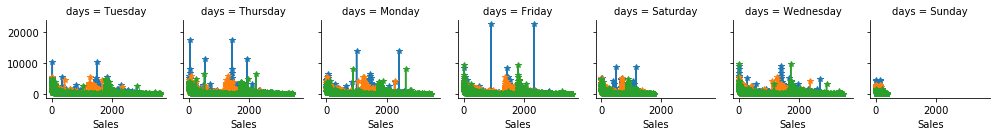

In [30]:
# g = g.map(plt.hist, "total_bill")
g5 = sns.FacetGrid(df2,col='days', hue='Category',size=2)
g5.map(plt.plot,"Sales", marker= "*")
# plt.savefig("D:/dat5/mSales")

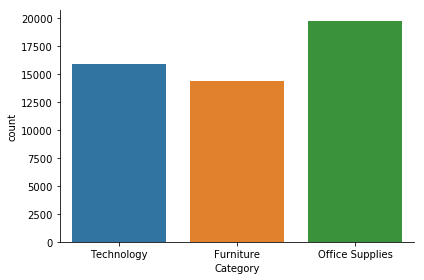

In [79]:
sns.countplot(x='Category',data=df2)
sns.despine()             
plt.tight_layout()

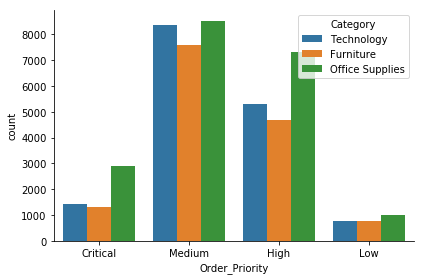

In [81]:
sns.countplot(x='Order_Priority',hue='Category',data=df2)
sns.despine()             
plt.tight_layout()

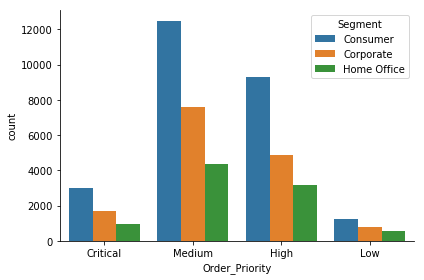

In [87]:
sns.countplot(x='Order_Priority',hue='Segment',data=df2)
sns.despine()             
plt.tight_layout()

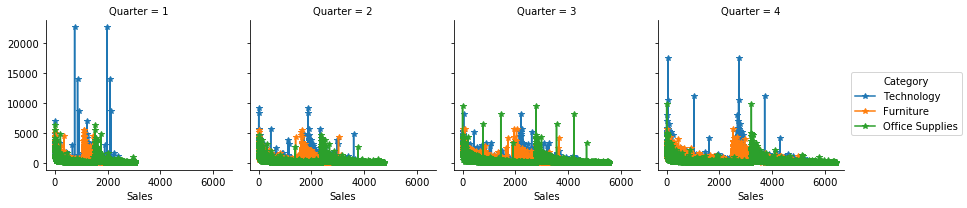

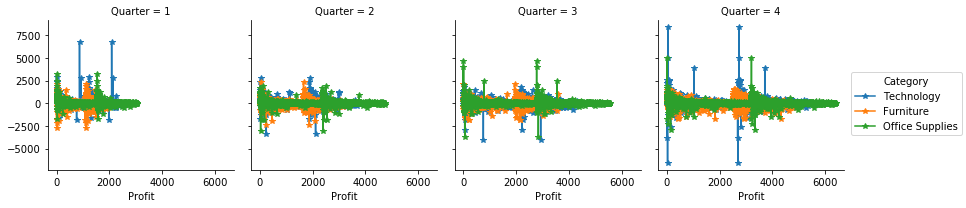

In [129]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Quarter', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Quarter', hue='Category',size=3)
g8.map(plt.plot,"Profit", marker= "*").add_legend()

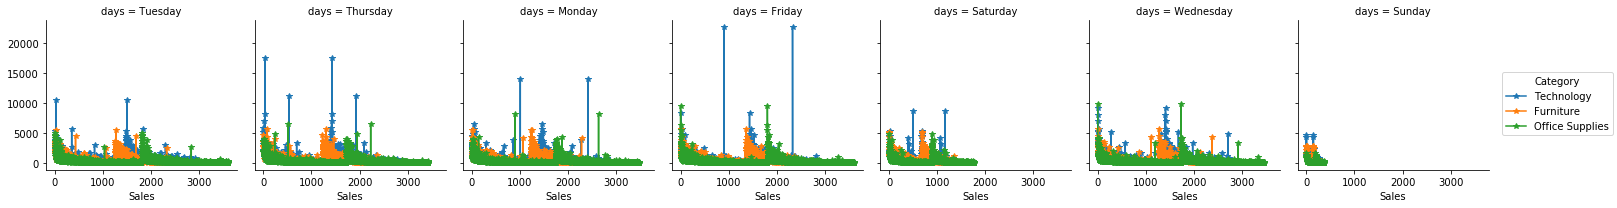

In [157]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='days', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

plt.savefig("D:/dat5/daySales.png")

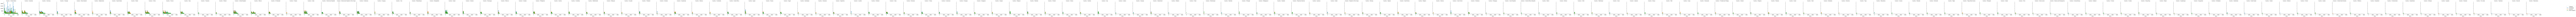

In [158]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Country', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

plt.savefig("D:/dat5/ctrySales.png")

In [188]:
cnt = df2.groupby(['Customer.Name','month'])['Sales'].count().nlargest(10)
cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
#sns.
cnt1[1:2]

Customer.Name     month
Heather Jas       8        34
Paul Prost        2        34
Harry Marie       12       32
Barry Gonzalez    9        30
Brad Eason        8        30
Eric Murdock      9        30
Nick Radford      6        30
Stefania Perrino  12       30
William Brown     12       30
Jack Lebron       6        28
Name: Sales, dtype: int64

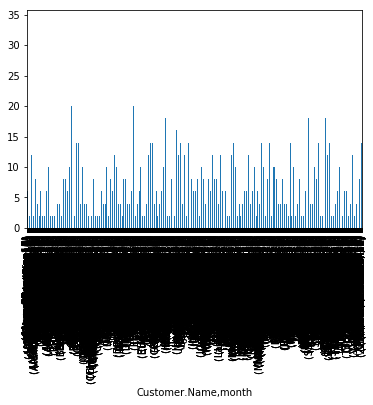

In [193]:
cnt1.plot(kind='bar')

            Category
year month          
2012 1            44
     2            50
     3           110
     4           120
     5           128
     6            96
     7           120
     8           138
     9           222
     10          140
     11          284
     12          272
2013 1            78
     2            78
     3           150
     4           132
     5           166
     6           172
     7           150
     8           144
     9           262
     10          134
     11          306
     12          328
2014 1           122
     2            90
     3           184
     4           152
     5           192
     6           188
     7           204
     8           190
     9           376
     10          224
     11          374
     12          360


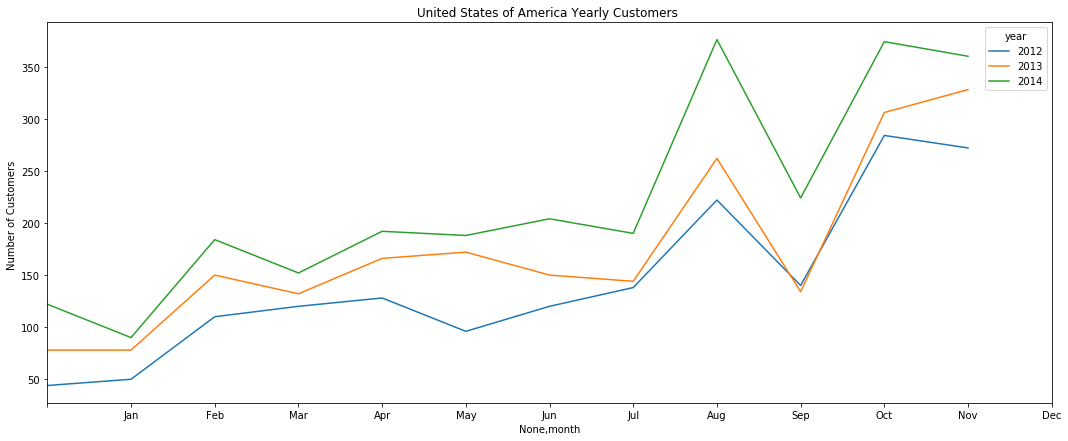

In [122]:
# df3 = df2.loc[df2['City'] == 'New York City',('year','month','Category')]
#warranty.loc[(warranty.City == 'Istanbul') & (warranty.Sales > 31)]

df3 = df2.loc[(df2.Country== 'United States') & (df2.year != 2011),('year','month','Category')]

cnt = df3.groupby(['year','month']).count()
#cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
#sns.
print cnt
import calendar
fig, (axis1) = plt.subplots(1,1, figsize=(18,7))
cnt.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("United States of America Yearly Customers ")
tmp = axis1.set_ylabel("Number of Customers ")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

In [172]:
'''
df3 = df2.loc[(df2.year != 2011),('year','month','Country','Category')]
cnt = df3.groupby(['Country','year','month']).count()
cnt = cnt.unstack().T
cnt = pd.DataFrame(cnt)
cnt=cnt.fillsana(0)
'''
df3 = df2.loc[(df2.year != 2011),('year','month','Country','Category','Sales')]
cnt1 = df3.groupby(['Country','year','month'])['Sales'].count()
cnt1 = cnt1.unstack().T.fillna(0)
#print cnt1
# cnt1.to_csv("D:/dat5/cnt1.csv")
cnt1.info()
#mell = pd.melt(cnt1,id_vars=['month'],var_name='Country',value_name = 'Sales')

pd.melt(cnt1,id_vars=['month'], var_name = ('United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France', 'Italy',
       'Tanzania', 'Poland', 'United Kingdom', 'Mexico', 'El Salvador',
       'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia',
       'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Somalia',
       'Guatemala', 'Belarus', 'Cambodia', 'South Africa', 'Japan',
       'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina',
       'Lesotho', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon',
       'Hungary', 'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland',
       'Ghana', 'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland',
       'Albania', 'Chad', 'Montenegro', 'Namibia', 'Portugal',
       'Madagascar', 'Sweden', 'Myanmar (Burma)', 'Jamaica', 'Qatar',
       'Republic of the Congo', 'Norway', 'Algeria', 'South Korea',
       'Nigeria', 'Estonia', "Cote d'Ivoire", 'Honduras', 'Paraguay',
       'Czech Republic', 'Central African Republic', 'Benin', 'Bolivia',
       'Chile', 'Martinique', 'Syria', 'Lebanon', 'Kenya', 'Mali', 'Libya',
       'Venezuela', 'Trinidad and Tobago', 'Ireland', 'Bulgaria', 'Panama',
       'Israel', 'Haiti', 'Barbados', 'Slovenia', 'Togo', 'Mauritania',
       'Guinea', 'Rwanda', 'Denmark', 'Niger', 'Papua New Guinea',
       'Mongolia', 'Sudan', 'Peru', 'Sierra Leone',
       'Bosnia and Herzegovina', 'Guinea-Bissau', 'Djibouti', 'Tunisia',
       'Croatia', 'Hong Kong', 'Nepal', 'Guadeloupe', 'Kyrgyzstan',
       'Zimbabwe', 'Uzbekistan', 'South Sudan', 'Gabon', 'Bahrain',
       'Yemen', 'Jordan', 'United Arab Emirates', 'Moldova', 'Swaziland',
       'Turkmenistan', 'Kazakhstan', 'Ethiopia', 'Uganda', 'Slovakia',
       'Sri Lanka', 'Tajikistan', 'Burundi', 'Macedonia'),value_name = 'Sales')
        
#print(mell)


# print cnt[1:3]
# plot

#print cnt1[0:5]
# g8 = sns.FacetGrid(cnt,col='Country',hue='year',size=3)
# g8 = sns.FacetGrid(cnt,col='Country',row='Category',hue=cnt['year'],size=3)

# df_cust1 = pd.pivot_table(df2,index=['year','month','Country'],values=['Sales'], aggfunc=len,dropna=False,fill_value=0)
#print df_cust1

#att = sns.load_dataset("cnt1")
#g8 = sns.FacetGrid(att,col='Country',hue='year',col_wrap=5,size=1.5)
#g8.map(plt.plot,"Sales", marker= "*").add_legend()

# g = g.map(plt.hist, "total_bill")
#g3 = sns.FacetGrid(df2,col='month', hue='Category',size=5)
#g3.map(plt.plot,"Sales", marker= "*").add_legend()
#plt.savefig("D:/dat5/mSales")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Columns: 381 entries, (Afghanistan, 2012) to (Zimbabwe, 2014)
dtypes: float64(381)
memory usage: 35.8 KB


KeyError: 'month'

In [60]:
df3 = df2.loc[df2['Country'] == 'India',('month','Category')]
cnt = df3.groupby(['month']).count()
#cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
cnt.loc[:]
# plot
# g = g.map(plt.hist, "total_bill")
#g8 = sns.FacetGrid(df2,col='month', hue='Category',size=3)
# g8.map(plt.plot,"Category", marker= "*").add_legend()

,Category
month,
1,104
2,50
3,92
4,82
5,188
6,192
7,78
8,268
9,200


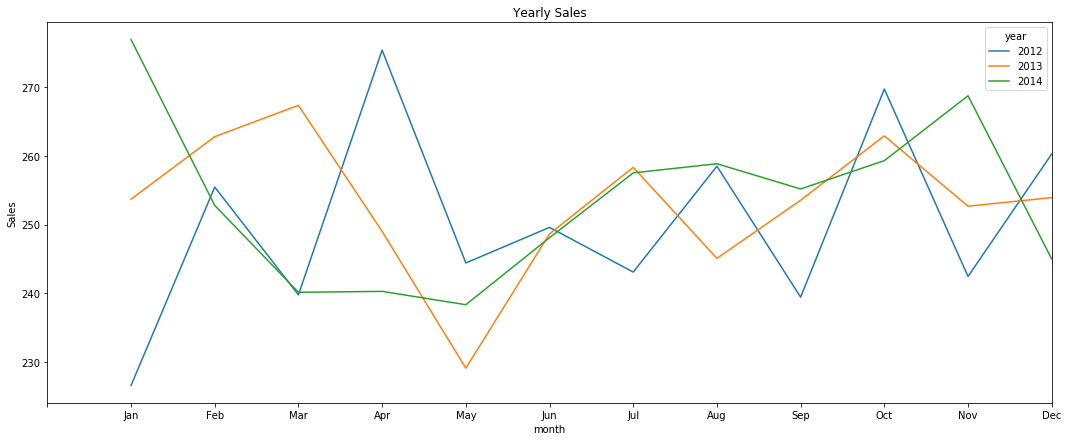

In [203]:
import calendar
# select all stores that were open
# subs = train[train['Open']!=0]
subs = df2[df2['year'] != 2011]

# groupby Year and Month
selected_sales = subs.groupby(['year', 'month'])['Sales'].median()

# groupby Year and Month
selected_sales = subs.groupby(['year', 'month'])['Sales'].median()
# selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(18,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

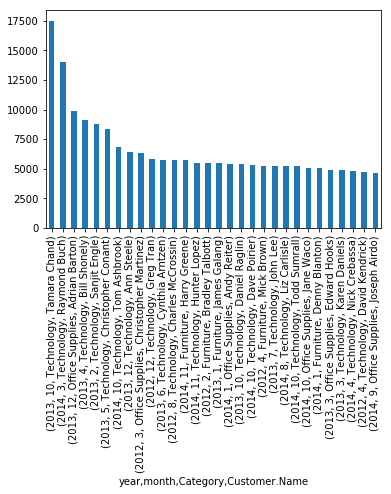

In [219]:
subs = df2[df2['year']!=2011]
selected_cust = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median().nlargest(30).plot(kind='bar')
selected_cust


# df_cust = pd.pivot_table(df2,index=['year','month','Customer.Name'],values=['Sales'], aggfunc=[np.sum],dropna=False)
# df_cust = pd.pivot_table(df2,index=['year','month','Customer.Name'],aggfunc=len,dropna=False)

#df_cust.head(3)

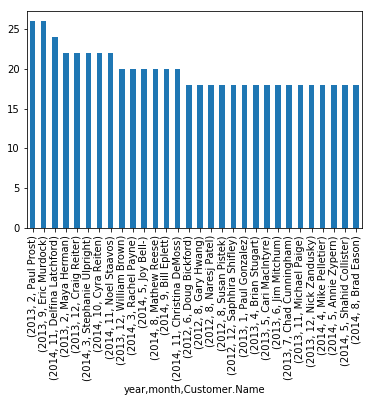

In [217]:
selected_cust1 = subs.groupby(['year', 'month','Customer.Name'])['Sales'].count().nlargest(30).plot(kind='bar')
selected_cust1

In [268]:
subs =df2[df2['year']==2014]
#subs
# groupby Year and Month
# selected_sales = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median().nlargest(20)
#selected_sales = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median()
# selected_cust = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].value_counts().nlargest(20)
# selected_cust = subs.groupby(['month']).value_counts()
# print selected_cust
# selected_cust = subs.groupby(['year', 'month','Customer.Name'])['Sales'].count()

# selected_cust = df2.groupby(pd.Grouper(freq='D')).apply(lambda x : x.Customer.Name.value_counts()).stack()
selected_cust =df2.groupby(pd.Grouper(freq='D')).apply(lambda x : x.Customer.Name.value_counts()).stack()
print selected_cust
# plot
fig, (axis1) = plt.subplots(1,1, figsize=(28,10))
selected_cust.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [187]:
''' 
    df
  location  name  Jan-2010  Feb-2010  March-2010
0        A  test        12        20          30
1        B   foo        18        20          25
>>> df2 = pd.melt(df, id_vars=["location", "name"], 
                  var_name="Date", value_name="Value")
>>> df2
'''
df11 = pd.DataFrame( { 
    "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] , 
    "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"] } )
#print df11
#print df11.shape
#print type(df11)
hg1 = df11.groupby([ "Name", "City"]).count()
print (hg1)
#type(g1)
print hg1.index
  

Empty DataFrame
Columns: []
Index: [(Alice, Seattle), (Bob, Seattle), (Mallory, Portland), (Mallory, Seattle)]
MultiIndex(levels=[[u'Alice', u'Bob', u'Mallory'], [u'Portland', u'Seattle']],
           labels=[[0, 1, 2, 2], [1, 1, 0, 1]],
           names=[u'Name', u'City'])


,Name,City
0,Alice,Seattle
1,Bob,Seattle
2,Mallory,Portland
3,Mallory,Seattle


In [28]:
 # dff1 = df2.ix[['Order_Date'] > '2014-01-01':'2014-01-10']
 # dff1.shape

dff2 = df2[(df2['Order_Date'] > '2014-01-01') &  (df2['Order_Date'] > '2014-10-14') ]    
print dff2.shape
dff2.head()
# If the dates are in the index then simply:
# df['20160101':'20160301']

(5020, 32)


,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Profit,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days
16,17,36178,CA-2014-143567,2014-11-03,11/6/2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,...,517.4793,780.70,Critical,No,0,2014,11,3,0,Monday
19,20,49463,TZ-2014-8190,2014-12-05,12/7/2014,Second Class,RH-9555,Ritsa Hightower,Consumer,Uvinza,...,818.2800,763.38,High,No,0,2014,12,5,4,Friday
37,38,31980,US-2014-168116,2014-11-05,11/5/2014,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,...,-3839.9904,674.82,High,No,0,2014,11,5,2,Wednesday
41,42,29272,IN-2014-37320,2014-11-11,11/15/2014,Standard Class,BF-11005,Barry Franz,Home Office,Gorakhpur,...,632.5200,658.69,High,No,0,2014,11,11,1,Tuesday
49,50,6550,MX-2014-126984,2014-12-18,12/20/2014,Second Class,JH-15820,John Huston,Consumer,Paysand�,...,868.1200,634.53,High,No,0,2014,12,18,3,Thursday


In [6]:
# row slicing and column slicing
# select rows 0,1,2 and not 3 plus select columns 0,1,3 and not 4th column
df2.iloc[0:3,0:4]

,Unnamed: 0,Row.ID,Order_ID,Order_Date
0,1,32298,CA-2012-124891,7/31/2012
1,2,26341,IN-2013-77878,2/5/2013
2,3,25330,IN-2013-71249,10/17/2013


In [8]:
# integer based
df2.iloc[[0,3,4],:]
# label based one
df2.loc[[0,3,4],:]

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [9]:
df2.loc[[0,3,4],:]

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [48]:
df2.head()

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days,Sales2
0,1,32298,CA-2012-124891,2012-07-31,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,933.57,Critical,No,0,2012,7,31,1,Tuesday,0.023097
1,2,26341,IN-2013-77878,2013-02-05,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,923.63,Critical,Yes,1,2013,2,5,1,Tuesday,0.037094
2,3,25330,IN-2013-71249,2013-10-17,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,915.49,Medium,No,0,2013,10,17,3,Thursday,0.051752
3,4,13524,ES-2013-1579342,2013-01-28,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,910.16,Medium,No,0,2013,1,28,0,Monday,0.028925
4,5,47221,SG-2013-4320,2013-11-05,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,903.04,Critical,No,0,2013,11,5,1,Tuesday,0.028330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000176F4828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C627780>]], dtype=object)

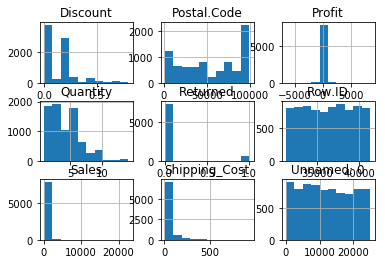

In [87]:
plt.figure(figsize=(20,10))
df2.hist()

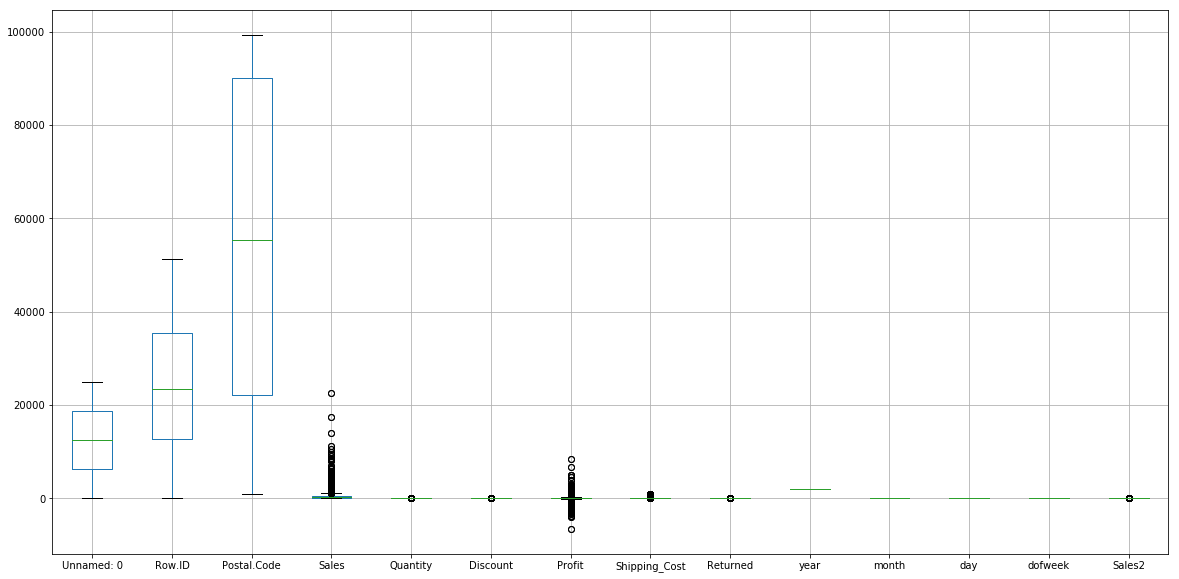

In [54]:
plt.figure(figsize=(20,10))
df2.boxplot()

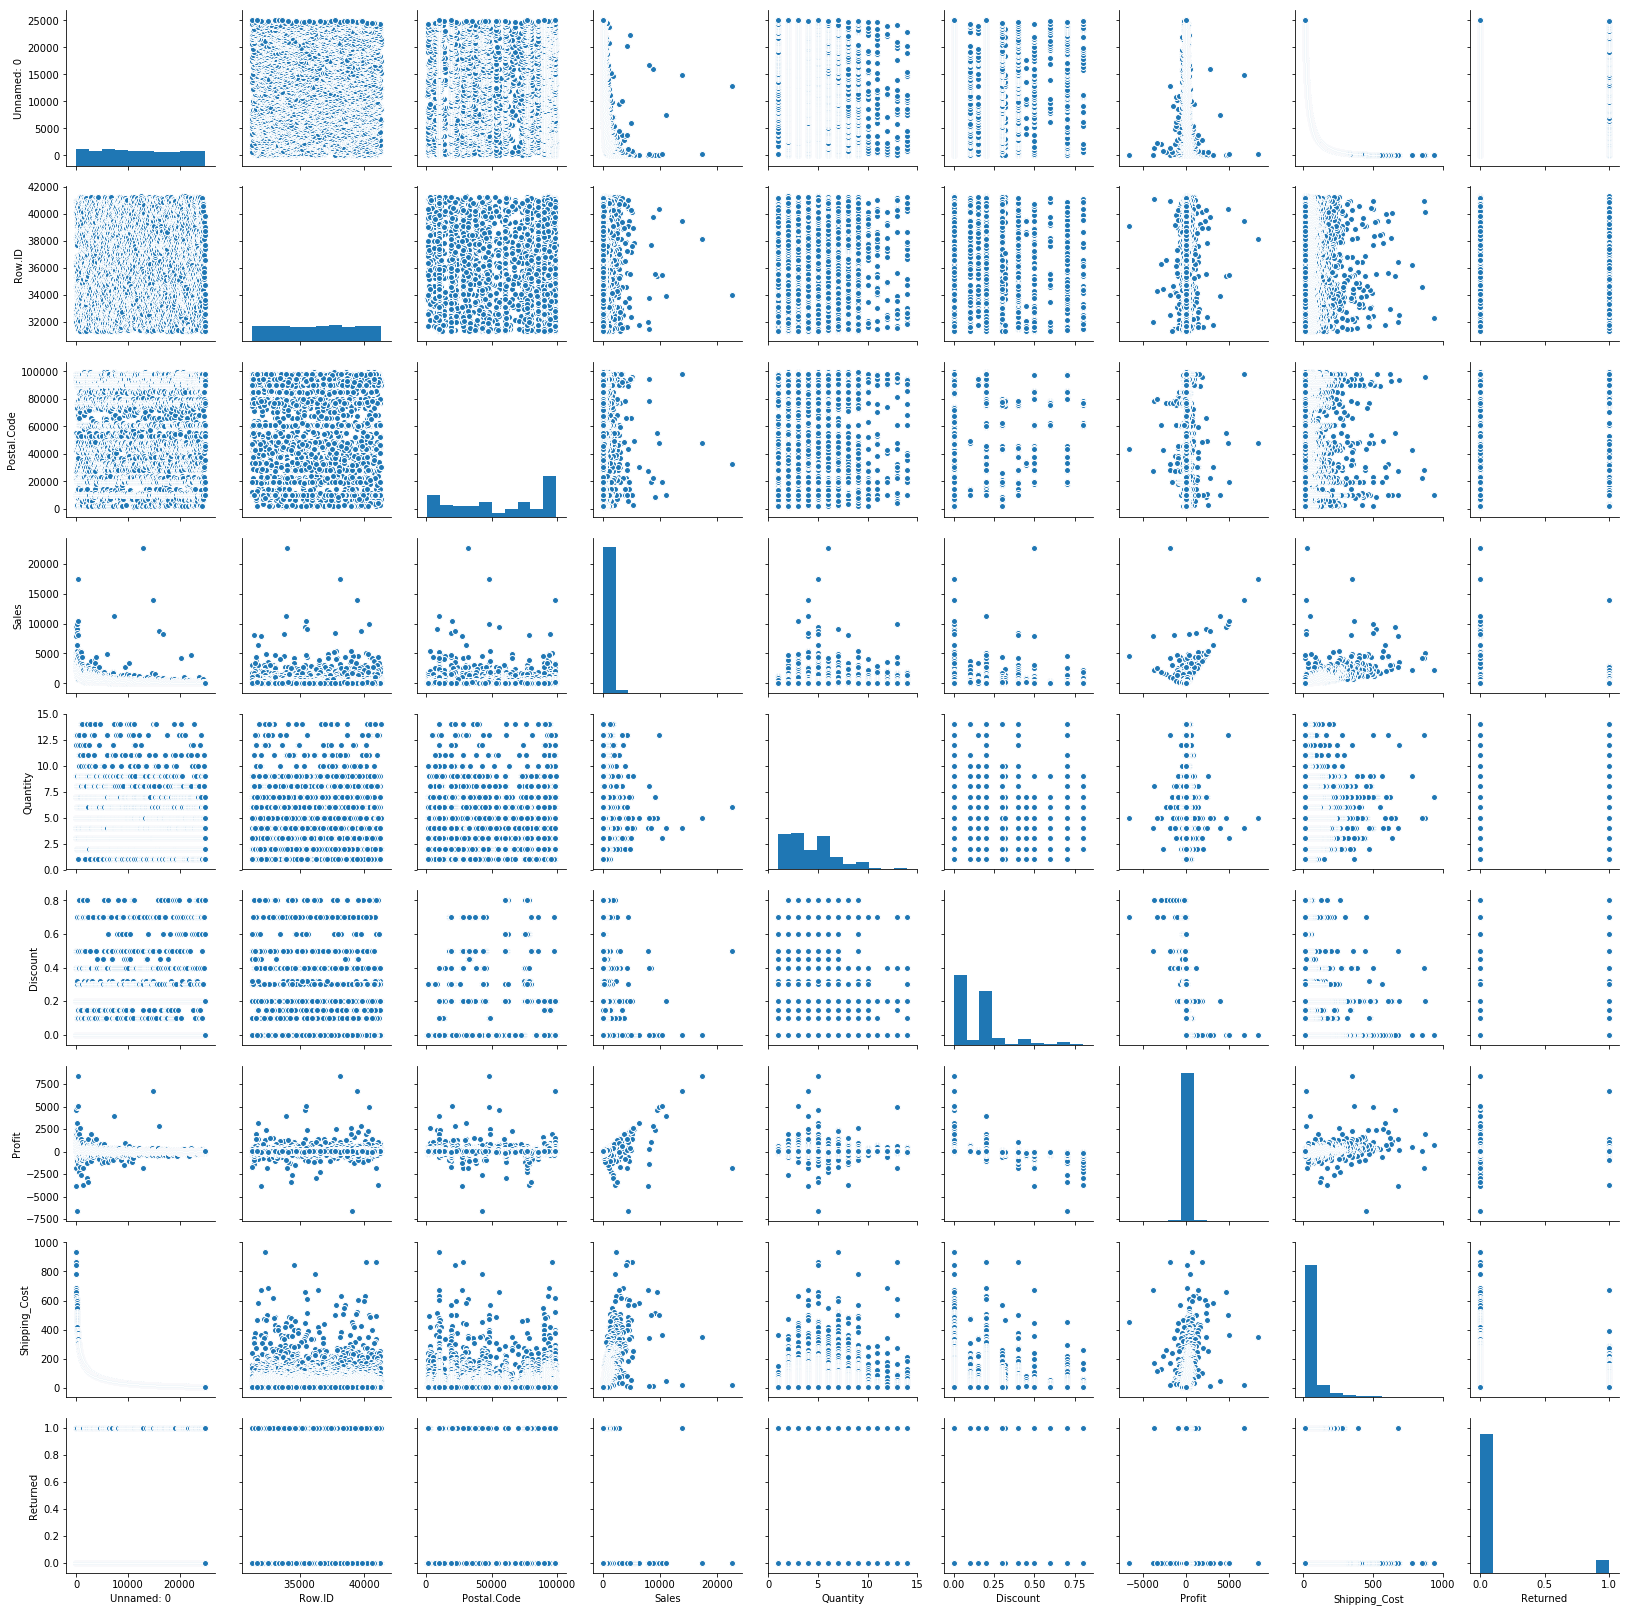

In [88]:
sns.pairplot(df2)


In [75]:
#((df2.isnull().sum() / df2.isnull().sum().count())  * 100).apply(lambda x:(int(x)))

# df2.isnull().sum() 
# df2.isnull().sum().count()  * 100
# df2.shape
((df2.isnull().sum() / df2.isnull().sum().count())  * 100)

Unnamed: 0             0.000000
Row.ID                 0.000000
Order_ID               0.000000
Order_Date             0.000000
Ship_Date              0.000000
Ship_Mode              0.000000
Customer_ID            0.000000
Customer.Name          0.000000
Segment               24.242424
City                   0.000000
State                  0.000000
Country                0.000000
Postal.Code       127006.060606
Market                 0.000000
Region                 0.000000
Product.ID             0.000000
Category               0.000000
Sub.Category           0.000000
Product.Name           0.000000
Sales                339.393939
Quantity               0.000000
Discount               0.000000
Profit                 0.000000
Shipping_Cost          0.000000
Order_Priority         0.000000
Return                 0.000000
Returned               0.000000
year                   0.000000
month                  0.000000
day                    0.000000
dofweek                0.000000
days    

In [73]:
df2.size

1650000

In [76]:
df2.isnull().sum()

Unnamed: 0            0
Row.ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer.Name         0
Segment               8
City                  0
State                 0
Country               0
Postal.Code       41912
Market                0
Region                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales               112
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
Return                0
Returned              0
year                  0
month                 0
day                   0
dofweek               0
days                  0
Sales2              112
dtype: int64

In [285]:
df2['Sales'].quantile(0.75)
df2.Profit.describe()

count    50000.000000
mean        55.601201
std        244.642416
min      -6599.978000
25%          3.537000
50%         32.951700
75%         89.992500
max       8399.976000
Name: Profit, dtype: float64

In [284]:
df2.Sales.describe()
df2.Profit.describe()
df2.groupby('Product.Name')['Profit'].sum().sort_values(ascending=False)

Product.Name
Canon imageCLASS 2200 Advanced Copier                                          50399.85600
Cisco Smart Phone, Full Size                                                   34477.04120
Motorola Smart Phone, Full Size                                                34054.22600
Hoover Stove, Red                                                              23615.93800
Sauder Classic Bookcase, Traditional                                           21344.14600
Harbour Creations Executive Leather Armchair, Adjustable                       20854.65200
Cisco Smart Phone, with Caller ID                                              19800.18160
Nokia Smart Phone, with Caller ID                                              18930.65140
Belkin Router, USB                                                             17910.03600
Hewlett Wireless Fax, High-Speed                                               17355.87828
Canon Wireless Fax, Laser                                                    

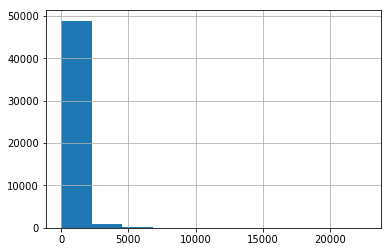

In [83]:
df2.Sales.hist()

In [117]:
#def treatOutlier(df,var):
 #   if(is.float(df[,var])):
   #     per.95 = quantile(df[,var],0.95)
# 0.1 is 10th percentile,   0.5 is median, 0.9 is 90th percentile
print df2['Sales'].quantile([0,0.1,0.2,0.9,0.95,0.99,1])
print df2['Sales'].max()

0.00       16.192
0.10       82.140
0.20      115.800
0.90     1019.520
0.95     1516.320
0.99     2897.910
1.00    22638.480
Name: Sales, dtype: float64
22638.48


In [252]:
df3=df2.copy()
x = df3['Sales'].quantile([0.9]).values
val = float(x)
df3['Sales'] = np.where(df3['Sales']> val, val,df3['Sales'])

In [272]:
df2.Sales.describe()

count    49888.000000
mean       452.892613
std        622.530300
min         16.192000
25%        134.606250
50%        252.716780
75%        525.855000
max      22638.480000
Name: Sales, dtype: float64

# Treating Outlier 

In [75]:
df3.describe()

,Unnamed: 0,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping_Cost,Returned
count,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000
mean,12155.878315,36299.354895,55082.079554,511.450286,4.333829,0.138340,61.435422,54.269180,0.082280
std,7268.956995,2894.560672,32514.869429,896.323619,2.385945,0.162898,363.374812,80.803806,0.274808
min,1.000000,31297.000000,1040.000000,16.192000,1.000000,0.000000,-6599.978000,8.230000,0.000000
25%,5916.250000,33740.500000,22204.000000,141.379000,3.000000,0.000000,5.798000,14.245000,0.000000
50%,11906.000000,36350.000000,55407.000000,272.940000,4.000000,0.200000,34.892800,26.870000,0.000000
75%,18516.250000,38792.250000,90026.000000,562.841125,6.000000,0.200000,86.351700,57.120000,0.000000
max,24981.000000,41290.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000,1.000000


In [82]:
# l2 = [10,20,30] ; l2 = l1  # list 
# l2 = list(l1)
df3=df2.copy()
print df3['Sales'].quantile([0.1,0.25,0.3,0.75,0.9,.99,1]).values
print df3['Sales'].max()
#df3['Sales'].hist()
IQR = 562 - 141
IQR
562 + 1.5 * (421)

[    81.98        141.379       161.568       562.841125   1088.76
   3930.072     22638.48    ]
22638.48


1193.5

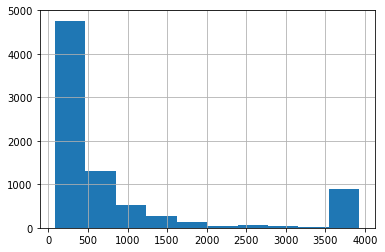

In [86]:
df3.Sales.hist()

In [85]:
df3=df2.copy()
print df3['Sales'].quantile([0.01,0.1,0.9]).values
def treatOutlier(df,var):
    x = df[var].quantile([0.99]).values
    val = float(x)
    x1 = df[var].quantile([0.1]).values
    val2=float(x1)
    df[var] = np.where(df[var]> val, val,df[var])
    df[var] = np.where(df[var] < val2, val,df[var])
    return 
treatOutlier(df3,'Sales')

[   35.568    81.98   1088.76 ]


In [ ]:
# upper quartile + 1.5 * (IQR)
# lower quartile - 1.5 * (IQR)

{'boxes': [<matplotlib.lines.Line2D at 0x11d59940>],
 'caps': [<matplotlib.lines.Line2D at 0x16334668>,
 'fliers': [<matplotlib.lines.Line2D at 0x16321710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16321198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d59a90>,
  <matplotlib.lines.Line2D at 0x163340f0>]}

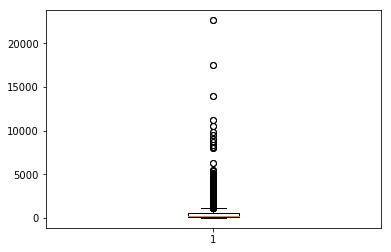

In [77]:
plt.boxplot(df3.Sales)

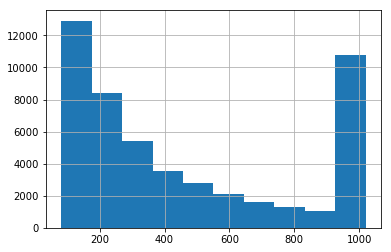

In [274]:
df3.Sales.hist()

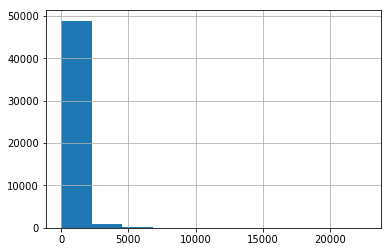

In [240]:
df2.Sales.hist()

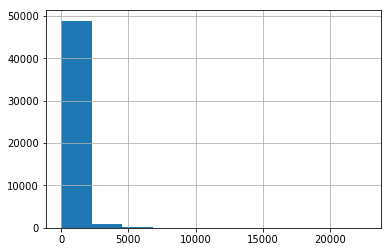

In [129]:
df2.Sales.hist()

In [121]:
y1 = np.linspace(0.1, 1.1, 6)
y1

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1])

In [115]:
y1 = np.linspace(0, 0.1, 10)
y1

array([ 0.        ,  0.01111111,  0.02222222,  0.03333333,  0.04444444,
        0.05555556,  0.06666667,  0.07777778,  0.08888889,  0.1       ])

In [89]:
help(df.query)

Help on method query in module pandas.core.frame:

query(self, expr, inplace=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Query the columns of a frame with a boolean expression.
    
    Parameters
    ----------
    expr : string
        The query string to evaluate.  You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    inplace : bool
        Whether the query should modify the data in place or return
        a modified copy
    
        .. versionadded:: 0.18.0
    
    kwargs : dict
        See the documentation for :func:`pandas.eval` for complete details
        on the keyword arguments accepted by :meth:`DataFrame.query`.
    
    Returns
    -------
    q : DataFrame
    
    Notes
    -----
    The result of the evaluation of this expression is first passed to
    :attr:`DataFrame.loc` and if that fails because of a
    multidimensional key (e.g., a DataFrame) then the result will be pa